##Logistic Regression With Scikit-Learn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Loading the data-set
from google.colab import files
upload = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [4]:
data = pd.read_csv('weatherAUS.csv')
data.head() 

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.describe(include='all')

Date  Location  ...  RainToday  RainTomorrow
count       145460    145460  ...     142199        142193
unique        3436        49  ...          2             2
top     2015-10-05  Canberra  ...         No            No
freq            49      3436  ...     110319        110316
mean           NaN       NaN  ...        NaN           NaN
std            NaN       NaN  ...        NaN           NaN
min            NaN       NaN  ...        NaN           NaN
25%            NaN       NaN  ...        NaN           NaN
50%            NaN       NaN  ...        NaN           NaN
75%            NaN       NaN  ...        NaN           NaN
max            NaN       NaN  ...        NaN           NaN

[11 rows x 23 columns]

In [7]:
data.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

###Exploratory Data Analysis and Visualization

In [9]:
px.histogram(data, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [10]:
px.histogram(data, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [11]:
px.histogram(data, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [12]:
px.scatter(data.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [13]:
px.strip(data.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

###Training, Validation and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [16]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


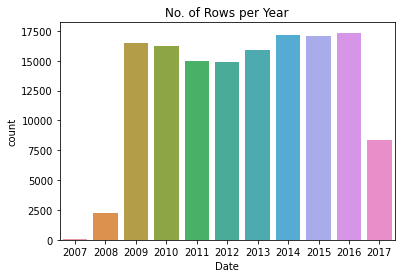

In [18]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(data.Date).dt.year);

In [19]:
year = pd.to_datetime(data.Date).dt.year
train_df = data[year < 2015]
val_df = data[year == 2015]
test_df = data[year > 2015]

In [20]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [23]:
train_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
144548  2014-12-27    Uluru     16.9  ...     31.8         No            No
144549  2014-12-28    Uluru     15.1  ...     34.8         No            No
144550  2014-12-29    Uluru     17.3  ...     35.7         No            No
144551  2014-12-30    Uluru     20.1  ...     37.2         No            No
144552  2014-12-31    Uluru     22.5  ...     37.4         No            No

[97988 rows x 23 columns]

In [24]:
val_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2133    2015-01-01   Albury     11.4  ...     32.7         No            No
2134    2015-01-02   Albury     15.5  ...     38.2         No            No
2135    2015-01-03   Albury     17.1  ...     37.0         No            No
2136    2015-01-04   Albury     26.0  ...     30.9         No            No
2137    2015-01-05   Albury     19.0  ...     32.5         No            No
...            ...      ...      ...  ...      ...        ...           ...
144913  2015-12-27    Uluru     20.5  ...     33.0         No            No
144914  2015-12-28    Uluru     18.0  ...     35.0         No            No
144915  2015-12-29    Uluru     17.5  ...     34.7         No            No
144916  2015-12-30    Uluru     20.0  ...     38.4         No            No
144917  2015-12-31    Uluru     19.3  ...     35.8         No            No

[17089 rows x 23 columns]

In [25]:
test_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2498    2016-01-01   Albury     20.4  ...     36.7         No            No
2499    2016-01-02   Albury     20.9  ...     31.7         No           Yes
2500    2016-01-03   Albury     18.4  ...     19.5        Yes           Yes
2501    2016-01-04   Albury     17.3  ...     21.6        Yes           Yes
2502    2016-01-05   Albury     15.5  ...     22.2        Yes            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[25710 rows x 23 columns]

###

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [26]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [27]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [28]:
target_col

'RainTomorrow'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [29]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [30]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [31]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [32]:
train_inputs

Location  MinTemp  MaxTemp  ...  Temp9am  Temp3pm  RainToday
0        Albury     13.4     22.9  ...     16.9     21.8         No
1        Albury      7.4     25.1  ...     17.2     24.3         No
2        Albury     12.9     25.7  ...     21.0     23.2         No
3        Albury      9.2     28.0  ...     18.1     26.5         No
4        Albury     17.5     32.3  ...     17.8     29.7         No
...         ...      ...      ...  ...      ...      ...        ...
144548    Uluru     16.9     33.2  ...     23.7     31.8         No
144549    Uluru     15.1     36.8  ...     28.9     34.8         No
144550    Uluru     17.3     37.8  ...     29.7     35.7         No
144551    Uluru     20.1     38.5  ...     29.8     37.2         No
144552    Uluru     22.5     39.6  ...     30.1     37.4         No

[97988 rows x 21 columns]

In [33]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
import numpy as np

In [34]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Let's view some statistics for the numeric columns.

In [35]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97674.000000  97801.000000  ...  61966.000000  97414.000000
mean      12.007831     23.022202  ...      4.410677     16.835126
std        6.347175      6.984397  ...      2.693370      6.404586
min       -8.500000     -4.100000  ...      0.000000     -5.900000
25%        7.500000     17.900000  ...      2.000000     12.200000
50%       11.800000     22.400000  ...      5.000000     16.600000
75%       16.600000     27.900000  ...      7.000000     21.400000
max       33.900000     48.100000  ...      9.000000     40.200000

[8 rows x 15 columns]

Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [36]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

###Imputing Missing Numeric Data

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy = 'mean')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [40]:
data[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
dtype: int64

These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for `train_inputs`, `val_inputs` and `test_inputs`.

In [41]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [43]:
imputer.fit(data[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [44]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [45]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [46]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [48]:
data[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm        Temp9am
count  140319.000000  140480.00000  ...  84693.000000  140131.000000
mean       12.184824      23.23512  ...      4.499250      16.987066
std         6.403879       7.11450  ...      2.719752       6.496012
min        -8.500000      -4.80000  ...      0.000000      -7.200000
25%         7.600000      17.90000  ...      2.000000      12.300000
50%        12.000000      22.60000  ...      5.000000      16.700000
75%        16.800000      28.30000  ...      7.000000      21.600000
max        33.900000      48.10000  ...      9.000000      40.200000

[8 rows x 15 columns]

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [52]:
scaler.fit(data[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [53]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [54]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...      Cloud3pm       Temp9am
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.493693      0.507089
std        0.149458      0.131904  ...      0.238028      0.134722
min        0.000000      0.013233  ...      0.000000      0.027426
25%        0.377358      0.429112  ...      0.333333      0.409283
50%        0.478774      0.514178  ...      0.499917      0.502110
75%        0.591981      0.618147  ...      0.666667      0.601266
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 15 columns]

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [55]:
data[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [62]:
data[categorical_cols] = data[categorical_cols].fillna('U')
encoder.fit(data[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [63]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'U', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'U', 'W', 'WNW', 'WSW'], dtype=object),
 ar

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names`.

In [64]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

To perform the encoding, we use the `transform` method of `encoder`.

In [66]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('U')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('U')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('U')

In [67]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [68]:
test_inputs

Location   MinTemp  ...  RainToday_No  RainToday_Yes
2498     Albury  0.681604  ...           1.0            0.0
2499     Albury  0.693396  ...           1.0            0.0
2500     Albury  0.634434  ...           0.0            1.0
2501     Albury  0.608491  ...           0.0            1.0
2502     Albury  0.566038  ...           0.0            1.0
...         ...       ...  ...           ...            ...
145454    Uluru  0.283019  ...           1.0            0.0
145455    Uluru  0.266509  ...           1.0            0.0
145456    Uluru  0.285377  ...           1.0            0.0
145457    Uluru  0.327830  ...           1.0            0.0
145458    Uluru  0.384434  ...           1.0            0.0

[25710 rows x 123 columns]

###Training a Logistic Regression Model

####Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

we take linear combination (or weighted sum of the input features)
we apply the sigmoid function to the result to obtain a number between 0 and 1
this number represents the probability of the input being classified as "Yes"
instead of RMSE, the cross entropy loss function is used to evaluate the results

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(solver='liblinear')

In [72]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums'

In [74]:
print(model.coef_.tolist())

[[0.9829036865227888, -1.613863706065614, 3.256800083630204, 0.7394716434381717, -1.665731377978832, 6.71276579662956, -0.8946268489556785, -1.478625897970462, 0.5086318712442972, 5.668974390417303, 5.751421245527054, -9.442426996842153, -0.15422904082124647, 1.2692687336009258, 0.9611073881437431, 0.5968154138869795, -0.5433585415382709, 0.48410574044619475, 0.012693407281629047, 0.34210094055077545, -0.35029266474834103, 0.181450299012037, 0.42585163860109976, -0.00491160110579413, 0.015423282629625666, 0.2537685708650729, -0.018401717838170434, -0.030468452513049832, -0.46729416034063814, -0.1441895933435171, -0.5908163799241074, -0.7445763864089225, -0.24988345006079546, -0.328668120179614, -0.5709175743768212, 0.08016807114802602, 0.014035809720339697, 0.05995321733908681, -0.877145183557768, -0.44148774174671074, 0.011831377314253683, -0.45948004794013186, -0.4601828036343797, -0.07469007336536129, 0.19455743491094427, 0.44567790659590995, 0.6073708245131106, 0.4303937099518613, 

In [75]:
print(model.intercept_)

[-2.36394608]


## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [76]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [77]:
train_preds = model.predict(X_train)

In [78]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [79]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

We can output a probabilistic prediction using `predict_proba`.

In [80]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93950632, 0.06049368],
       [0.94333108, 0.05666892],
       [0.95980446, 0.04019554],
       ...,
       [0.98730084, 0.01269916],
       [0.98358089, 0.01641911],
       [0.87599609, 0.12400391]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [81]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(train_targets, train_preds)

0.8519002326815528

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94613466, 0.05386534],
       [0.477475  , 0.522525  ]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [86]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.19%


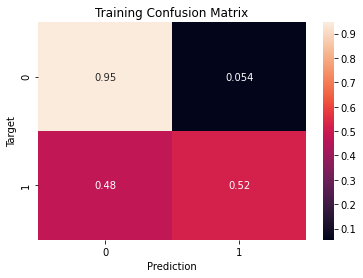

In [87]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 85.41%


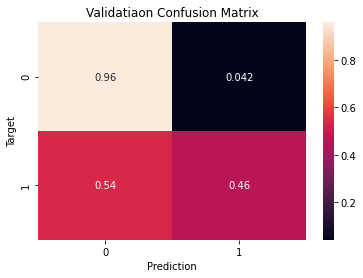

In [88]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.25%


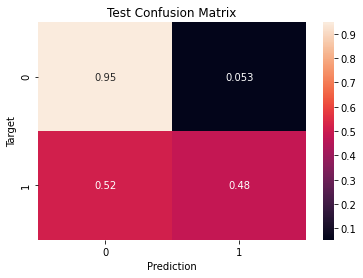

In [89]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [90]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [91]:
def all_no(inputs):
    return np.full(len(inputs), "No")

Let's check the accuracies of these two models on the test set.

In [92]:
accuracy_score(test_targets, random_guess(X_test))

0.49646052119797746

In [93]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

In [94]:
model1 = LogisticRegression()

In [95]:
def predict_and_plot(inputs, targets, name=''):
    preds = model1.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [96]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

The first step is to convert the dictionary into a Pandas dataframe, similar to `raw_df`. This can be done by passing a list containing the given dictionary to the `pd.DataFrame` constructor.

In [97]:
new_input_df = pd.DataFrame([new_input])

In [98]:
new_input_df

Date   Location  MinTemp  ...  Temp9am  Temp3pm  RainToday
0  2021-06-19  Katherine     23.2  ...     25.7     33.0        Yes

[1 rows x 22 columns]

We've now created a Pandas dataframe with the same columns as `data` (except `RainTomorrow`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [99]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [100]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  ...  WindDir3pm_WSW  RainToday_No  RainToday_Yes
0  0.747642  0.718336  0.027493  ...             0.0           0.0            1.0

[1 rows x 117 columns]

We can now make a prediction using `model.predict`.

In [101]:
prediction = model.predict(X_new_input)[0]

In [102]:
prediction

'Yes'

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [103]:
prob = model.predict_proba(X_new_input)[0]

In [104]:
prob

array([0.48884241, 0.51115759])

Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [105]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [106]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [107]:
predict_input(new_input)

('Yes', 0.6316567081481302)

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [110]:
import joblib

In [113]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [114]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [115]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [116]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8424737456242707

## Summary and References

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results



--> To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn. 





Downloading a  dataset.    
Exploratory data analysis and visualization.   
Splitting a dataset into training, validation & test sets.  
Filling/imputing missing values in numeric columns.  
Scaling numeric features to a  (0,1)  range.  
Encoding categorical columns as one-hot vectors.  
Training a logistic regression model using Scikit-learn.  
Evaluating a model using a validation set and test set.  
Saving a model.  